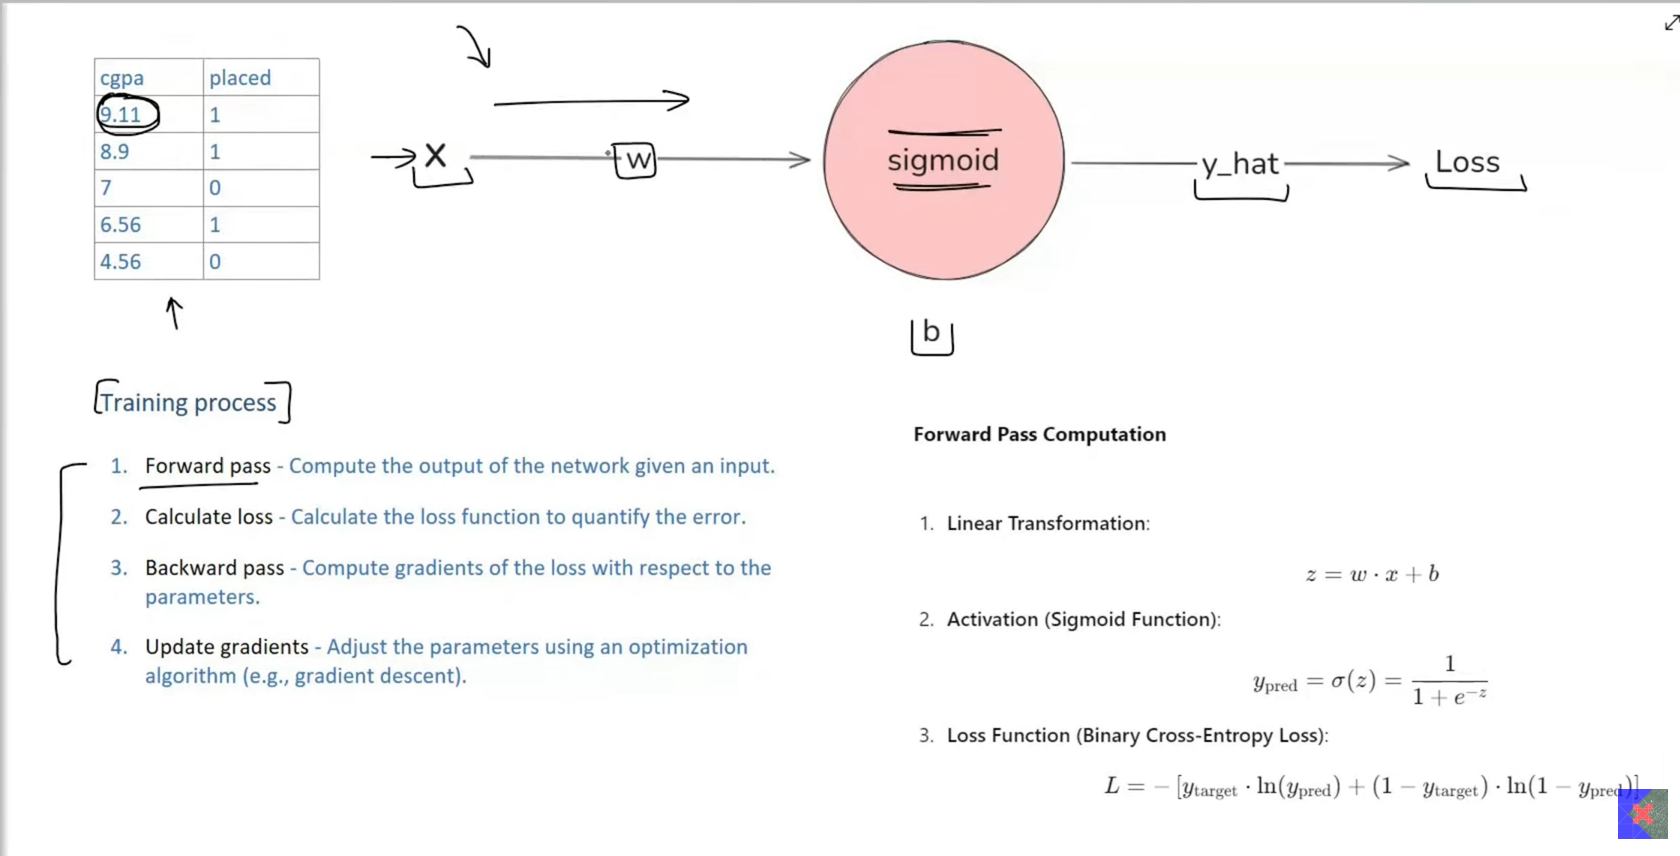

In [1]:
import torch

In [ ]:
# Kisi bhi tensor ka derivative wgera krna to requires_grad attribute likhna aur usko true set krna
x = torch.tensor(3.0, requires_grad=True)


In [ ]:
y=x**2

In [ ]:
x

tensor(3., requires_grad=True)

In [ ]:
y

tensor(9., grad_fn=<PowBackward0>)

In [ ]:
# derivative
y.backward()

In [ ]:
x.grad

tensor(6.)

# Eg 2

In [ ]:
x = torch.tensor(4.0, requires_grad=True)

In [ ]:
y = x**2

In [ ]:
z = torch.sin(y)

In [ ]:
z.backward()

In [ ]:
x.grad

tensor(-7.6613)

# input tensor - leaf
#   output tensor - node

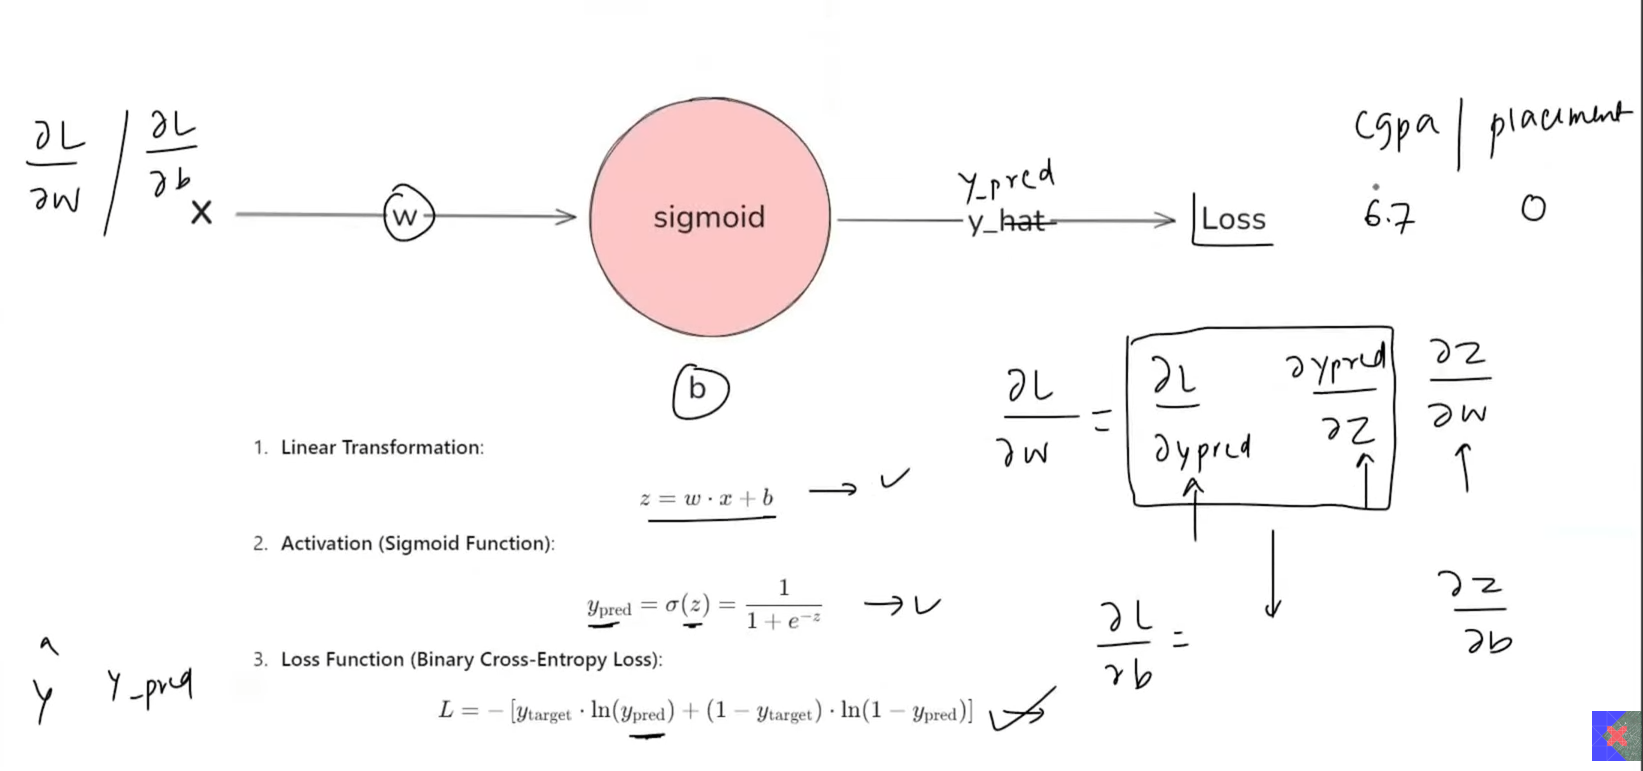

# Creating this neural network model

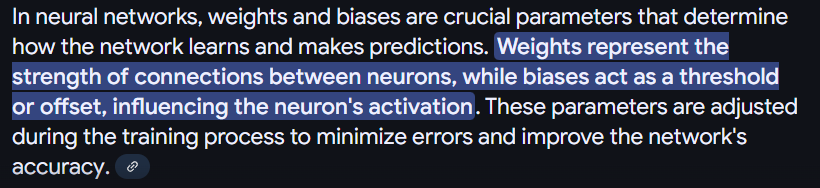

In [ ]:
# inputs

x = torch.tensor(6.7)  # input feature
y = torch.tensor(0)    #true label(binary)

w = torch.tensor(1.0)  # weight
b = torch.tensor(0.0)  # bias

In [ ]:
# binary cross-entropy loss for scalar
def binary_cross_entropy_loss(prediction, target):
  epsilon = 1e-8  # to prevent log(0)
  prediction = torch.clamp(prediction, epsilon, 1 - epsilon)
  return -(target * torch.log(prediction) + (1 - target) * torch.log(1 - prediction))

In [ ]:
# forward pass
z = w * x + b  # weighted sum(linear part)
y_pred = torch.sigmoid(z)  # predicted probability

# compute binary cross-entropy loss
loss = binary_cross_entropy_loss(y_pred, y)

In [ ]:
loss

tensor(6.7012)

In [ ]:
# Then find derivatives and all and print that.
# This was the calculation and making of neuron without using Autograd

# Now using Autograd

In [ ]:
x = torch.tensor(6.7,requires_grad=True)
y=(0.0)

In [ ]:
w=torch.tensor(1.0,requires_grad=True)
b=torch.tensor(0.0,requires_grad=True)

In [ ]:
w

tensor(1., requires_grad=True)

In [ ]:
b

tensor(0., requires_grad=True)

In [ ]:
z = w*x + b
z

tensor(6.7000, grad_fn=<AddBackward0>)

In [ ]:
y_pred = torch.sigmoid(z)
y_pred

tensor(0.9988, grad_fn=<SigmoidBackward0>)

In [ ]:
loss = binary_cross_entropy_loss(y_pred, y)
loss

tensor(6.7012)

In [ ]:
loss.backward()

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

tensor backward krte smay wo grad me value store krleta .say agr phle ans 4 ara tha aur firse chlaya to 8 aayega themn 12.to avoid this _(){inplace fn used}

In [2]:
x = torch.tensor(2.0 , requires_grad=True)
x

tensor(2., requires_grad=True)

In [3]:
y=x**2
y

tensor(4., grad_fn=<PowBackward0>)

In [4]:
y.backward()

In [5]:
x.grad

tensor(4.)

In [6]:
x.grad.zero_() #(yeh grad 0 krdeta hr bari chlane pr)

tensor(0.)

# Disable gradient tracking

so neural network bnne ke baad usme just forward pass req. hote beckward pass req. hi hote to ham usko htate by some given methods -->:

In [ ]:
# opt1 - requires_grad_(False)
# opt2 - Detach()
# opt3 - torch.no_grad()

In [7]:
x = torch.tensor(2.0 , requires_grad=True)
x

tensor(2., requires_grad=True)

In [8]:
y=x**2
y

tensor(4., grad_fn=<PowBackward0>)

In [9]:
y.backward()

In [10]:
x.grad

tensor(4.)

In [11]:
x.requires_grad_(False)

tensor(2.)

In [12]:
y.backward() #(see here grad=false krne ke baad nhi chlra ab)

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

## opt 2

In [19]:
x = torch.tensor(2.0 , requires_grad=True)
x

tensor(2., requires_grad=True)

In [20]:
z=x.detach()
z

tensor(2.)

In [21]:
y = x**2
y

tensor(4., grad_fn=<PowBackward0>)

In [22]:
y1=z**2
y1

tensor(4.)

In [24]:
 y.backward()

RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

# opt 3

In [27]:
a=torch.tensor(2.,requires_grad=True)
a

tensor(2., requires_grad=True)

In [28]:
with torch.no_grad():
  b=a**2

In [29]:
b

tensor(4.)

In [30]:
b.backward() #(yha autograd 3rd opt se htaya)

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn